In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

### load data

In [2]:
x_train = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)


In [3]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

### explore what happens when we limit the iterations allowed for the solver to converge on its solution. 

For the values i = 1; 2; : : : ; 40, build a logistic regression model with the max_iter set to i.

In [4]:
tr_loss_list = list()
tr_score_list = list()
weight_list = list()


# Build and evaluate model for each value i
for i in list(range(1,40)):
   
   logreg = LogisticRegression(penalty='l1', max_iter = i , solver='liblinear',random_state = 0)         
   logreg.fit(x_train,y_train) # fit model
   
   w0 = logreg.coef_[0][0]   
   weight_list.append(w0)
   
   y_pred_proba = logreg.predict_proba(x_train)[:,1] # convention
   loss = log_loss(y_train, y_pred_proba)
   tr_loss_list.append(loss)
   
   predict = logreg.predict(x_train)
   score = accuracy_score(y_train, predict)
   tr_score_list.append(score)

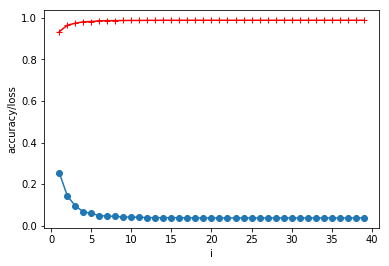

In [5]:
i = list(range(1,40))
plt.xlabel('i');
plt.ylabel('accuracy/loss');
plt.plot(i,tr_loss_list,marker='o')
plt.plot(i,tr_score_list,c="red",marker='+')


From our plot, we could know that, with increasing i, the maximum number of iterations taken for the solvers to converge, the accuracy increases and the loss decreases. Higher i leads to better convergence, but it also becomes more "expensive" computationally. It indicates that there is a trade-off between cost/accuracy and iteration time.

### plot with the values of i as x-axis and with the feature weight as y

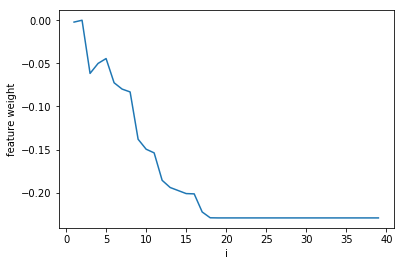

In [6]:
plt.xlabel('i');
plt.ylabel('feature weight');
plt.plot(i,weight_list)

### explore different values of the inverse penalty strength C

In [7]:
tr_loss_list2 = list()
tr_score_list2 = list()

C_grid = np.logspace(-9, 6, 31)

# Build and evaluate model for each value C
for C in C_grid:
   
   logreg = LogisticRegression(penalty='l1', C=C , solver='liblinear',random_state = 0,max_iter= 10000)       
   print(logreg)
   logreg.fit(x_train,np.ravel(y_train)) # fit model
   
   
   y_pred_proba = logreg.predict_proba(x_test)[:,1] # convention
   loss = log_loss(y_test, y_pred_proba)
   tr_loss_list2.append(loss)


   predict = logreg.predict(x_test)
   score = accuracy_score(y_test, predict)
   tr_score_list2.append(score)

best_i = np.argmin(tr_loss_list2)
best_c = C_grid[best_i]
bestmodel_c = LogisticRegression(penalty='l1', C=best_c, solver='liblinear',random_state = 0) 

LogisticRegression(C=1e-09, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LogisticRegression(C=3.1622776601683795e-09, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
LogisticRegression(C=1e-08, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LogisticRegression(C=3.162277660168379e-08, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='ovr', n_jobs=1, pena

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [8]:
bestmodel_c.fit(x_train, np.ravel(y_train)) 
print(calc_confusion_matrix_for_threshold(y_test, bestmodel_c.predict_proba(x_test)[:,1], thresh=0.5))
print("Best C-value for lr data: %.3f" % best_c) 

min_logloss = tr_loss_list2[best_i]
print("Test set log-loss at best C-value: %.4f" % min_logloss)

score = tr_score_list2[best_i]
print("Test set accuracy score at best C-value: %.4f" % score)

Predicted    0    1
True               
0          943   31
1           38  971
Best C-value for lr data: 0.316
Test set log-loss at best C-value: 0.0910
Test set accuracy score at best C-value: 0.9652


In [9]:
bestmodel_c = LogisticRegression(penalty='l1', C=best_c, solver='liblinear',random_state = 0) 
bestmodel_c.fit(x_train, np.ravel(y_train)) 
predict = bestmodel_c.predict(x_test)


### Analyze some of the mistakes that your best model makes

<Figure size 432x288 with 0 Axes>

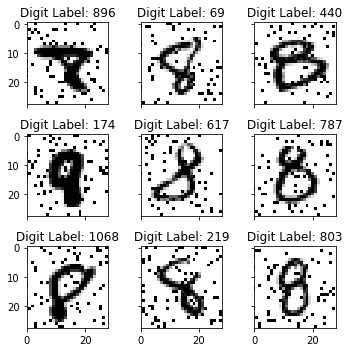

In [12]:
import random


FP= list()
FN = list()
for i in range(len(y_test)): 
    if predict[i]==1 and y_test[i]!=predict[i]:
       FP.append(i)
    if predict[i]==0 and y_test[i]!=predict[i]:
       FN.append(i)


fp9 = random.sample(FP,9)  
sample_images = x_test[fp9]

plt.clf()
plt.style.use('seaborn-muted')

fig, axes = plt.subplots(3,3, 
                         figsize=(5,5),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box', aspect='equal')) 

for i in range(9):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//3 
    subplot_col = i%3  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = sample_images[i].reshape((28,28))
    ax.imshow(plottable_image, cmap='gray_r',vmin = 0.0,vmax = 1.0)
    
    ax.set_title('Digit Label: {}'.format(fp9[i]))
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

Obviously, we can see that digit #174 was falsely classified as FP. 

<Figure size 432x288 with 0 Axes>

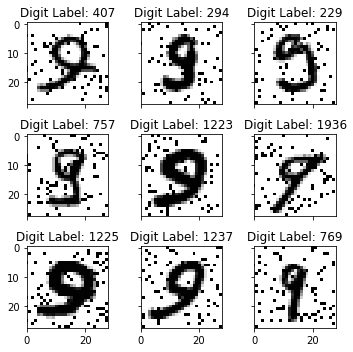

In [11]:
fn9 = random.sample(FN,9)  
sample_images = x_test[fn9]

plt.clf()
plt.style.use('seaborn-muted')

fig, axes = plt.subplots(3,3, 
                         figsize=(5,5),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box', aspect='equal')) 

for i in range(9):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//3 
    subplot_col = i%3  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = sample_images[i].reshape((28,28))
    ax.imshow(plottable_image, cmap='gray_r',vmin = 0.0,vmax = 1.0)
    
    ax.set_title('Digit Label: {}'.format(fn9[i]))
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

### Analyze all of the final weights produced by your classifier

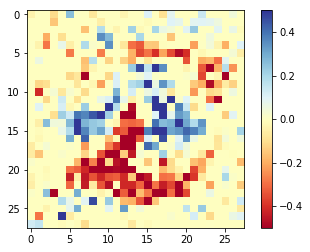

In [13]:
w = bestmodel_c.coef_  
image = w.reshape((28,28))
plt.imshow(image, cmap='RdYlBu',vmin = -0.5,vmax = 0.5)
plt.colorbar()
plt.show()

According to this diverging color map, we could know that the blue part represents positive weights(correspond to 9), and the red part represents negative weights(correspond to 8). The color changes from a heavily saturated to unsaturated means the weight changes towards 0.0. Those weights bring the pixels to 0.0.